# Decision Tree Classifier

In [3]:
CSV_LOCATION = '../datasets/heart-disease/heart_2020_cleaned.csv'

In [4]:
# Import dataset from file

import pandas as pd

data = pd.read_csv(CSV_LOCATION, low_memory=False)

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
# Preprocess the data

data2 = data.copy()

def min_max_scaling(series):
  """ Normalise value as explained in https://datagy.io/pandas-normalize-column/ """
  return (series - series.min()) / (series.max() - series.min())

data2['HeartDisease'] = pd.Categorical(data2['HeartDisease'])

# Categorise BMI as per https://www.health.nsw.gov.au/heal/Pages/bmi.aspx
data2['BMI'] = pd.cut(
  data2['BMI'],
  bins=[0, 18.5, 25, 30, 100],
  labels=[0, 1, 2, 3] # ['Underweight', 'Normal', 'Overweight', 'Obese']
)

data2['Smoking'] = pd.Categorical(data2['Smoking'])
data2['AlcoholDrinking'] = pd.Categorical(data2['AlcoholDrinking'])
data2['Stroke'] = pd.Categorical(data2['Stroke'])

data2['PhysicalHealth'] = min_max_scaling(data2['PhysicalHealth'])
data2['MentalHealth'] = min_max_scaling(data2['MentalHealth'])

data2['DiffWalking'] = pd.Categorical(data2['DiffWalking'])
data2['Sex'] = pd.Categorical(data2['Sex'])
data2['AgeCategory'] = pd.Categorical(data2['AgeCategory'])
data2['Race'] = pd.Categorical(data2['Race'])
data2['Diabetic'] = pd.Categorical(data2['Diabetic'])
data2['PhysicalActivity'] = pd.Categorical(data2['PhysicalActivity'])
data2['GenHealth'] = pd.Categorical(data2['GenHealth'])

# Categorise amount of sleep as per https://www.sleep.org/how-sleep-works/how-many-hours-of-sleep-do-we-need/
data2['SleepTime'] = pd.cut(
  data2['SleepTime'],
  bins=[0, 7, 9, 24],
  labels=['Low', 'Normal', 'High']
)

data2['Asthma'] = pd.Categorical(data2['Asthma'])
data2['KidneyDisease'] = pd.Categorical(data2['KidneyDisease'])
data2['SkinCancer'] = pd.Categorical(data2['SkinCancer'])

data2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,Low,Yes,No,Yes
1,No,1,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,Low,No,No,No
2,No,2,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,Normal,Yes,No,No
3,No,1,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,Low,No,No,Yes
4,No,1,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,Normal,No,No,No


The amounts of sleep are based on adult requirements, which are different to what is expected for children, babies, etc. It may be worthwhile for accuracy sake to set this label based on what is expected of that age. As well as this, using three bins may also not be detailed enough, so it could be good to extend this further.

Also, the normalised properties have not removed outliers and as a result these can potentially make a big impact of the normalised values. It would probably be good to filter out these outliers.

In [6]:
TEST_SIZE = 0.05
MAX_DEPTH = 4
CRITERION = 'gini'

In [7]:
# Format data for decision tree and create train/test split

from sklearn.model_selection import train_test_split

data3 = data2.copy()

Y = data3['HeartDisease']
X = pd.get_dummies(data3.drop(['HeartDisease'], axis=1), drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE)

Training set accuracy: 0.915
Test set accuracy: 0.919


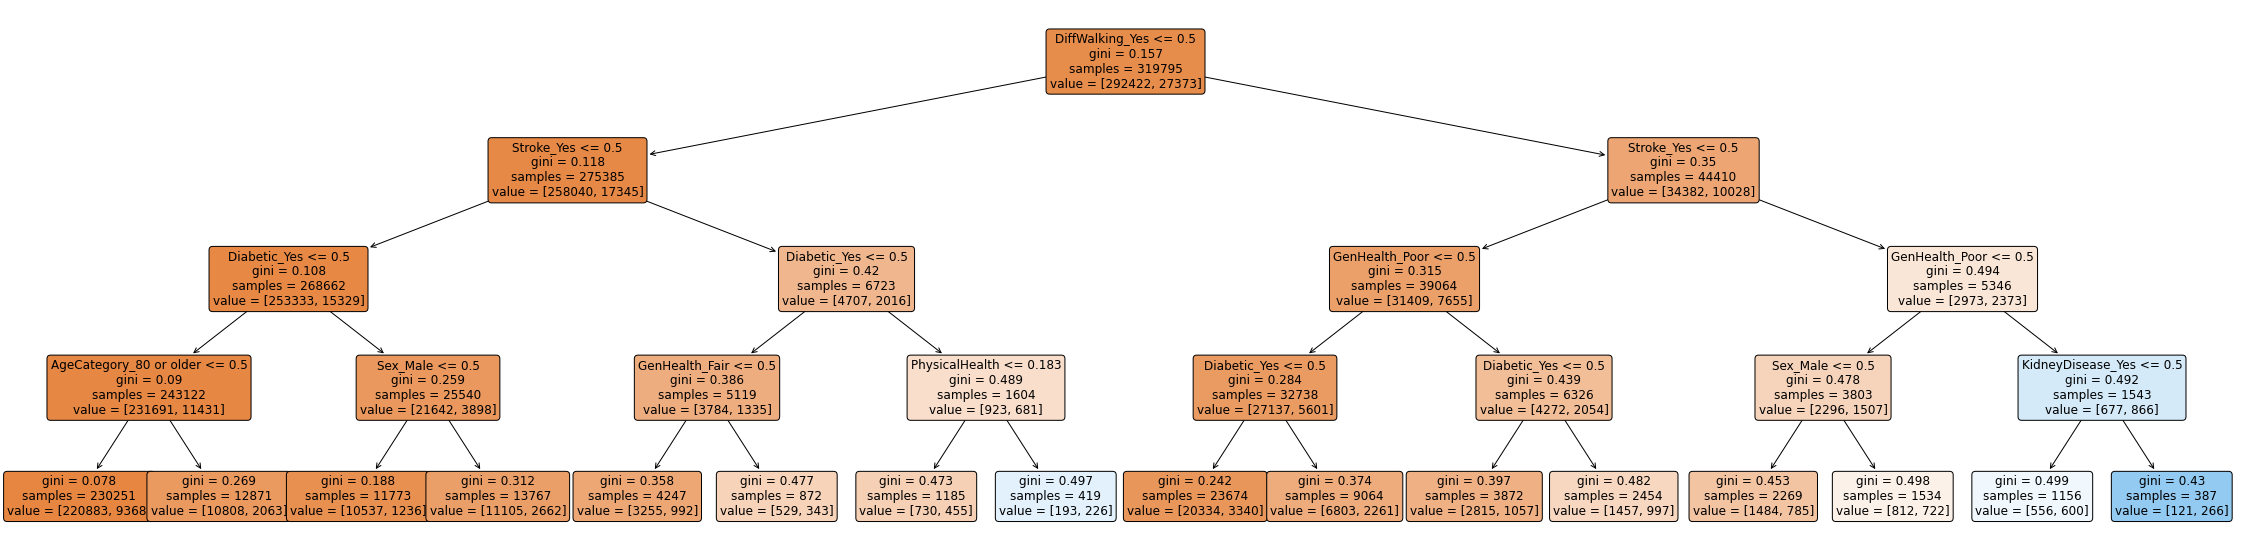

In [8]:
# Generate decision tree classifier

from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH)
clf.fit(X, Y)

print(f'Training set accuracy: {clf.score(x_train, y_train):.3f}')
print(f'Test set accuracy: {clf.score(x_test, y_test):.3f}')

plt.figure(figsize=(40, 10))
tree.plot_tree(clf, filled=True, rounded=True, fontsize=12, feature_names=X.axes[1])
plt.show()

False negative rate: 7.84%


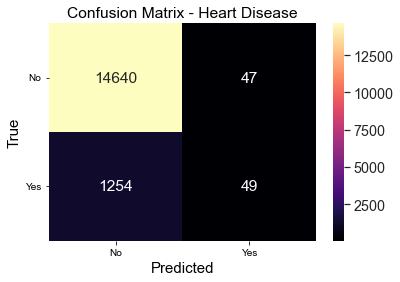

<Figure size 1080x720 with 0 Axes>

In [9]:
# Generate confusion matrix from testing the classifier

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

test_pred_decision_tree = clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

print(f'False negative rate: {matrix_df[0][1]/matrix_df.values.sum()*100:.2f}%')

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')

ax.set_title('Confusion Matrix - Heart Disease')
ax.set_xlabel('Predicted', fontsize=15)
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('True', fontsize=15)
ax.set_yticklabels(['No', 'Yes'], rotation=0)

plt.show()

With a test accuracy above 90% like this, from a machine learning perspective it could be considered fairly good. However, because it is being used in the medical field, the large amount of false negatives is concerning. The vast majority of incorrect values are false negatives, instead of false positives whereas it would need to be the opposite for medical work. It is far safer for the model to predict someone to be at risk and recommend further testing than predict someone is not at risk when they actually are. Because of this, we'll modify the way the model is generated in an attempt to lower the false negative rate. Even if the overall accuracy drops, the primary concern is the false negatives, so if a few percent are lost from overall accuracy into false positives, that will still be preferred for real use.

In [10]:
TEST_SIZE = 0.05
MAX_DEPTH = 18
CRITERION = 'gini'

In [11]:
# Format data for decision tree and create train/test split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE)

In [12]:
# Generate decision tree classifier

clf = tree.DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH)
clf.fit(X, Y)

print(f'Maximum depth: {clf.get_depth()}')
print(f'Training set accuracy: {clf.score(x_train, y_train):.3f}')
print(f'Test set accuracy: {clf.score(x_test, y_test):.3f}')


Maximum depth: 18
Training set accuracy: 0.945
Test set accuracy: 0.946


False negative rate: 5.07%


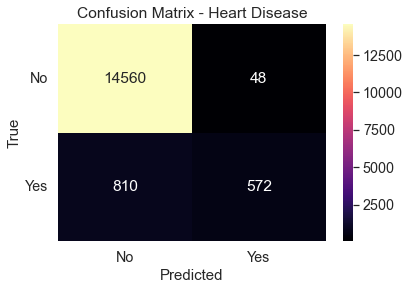

<Figure size 1080x720 with 0 Axes>

In [13]:
# Generate confusion matrix from testing the classifier

test_pred_decision_tree = clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

print(f'False negative rate: {matrix_df[0][1]/matrix_df.values.sum()*100:.2f}%')

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')

ax.set_title('Confusion Matrix - Heart Disease')
ax.set_xlabel('Predicted', fontsize=15)
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('True', fontsize=15)
ax.set_yticklabels(['No', 'Yes'], rotation=0)

plt.show()

Using gini impurity as the criterion with the higher max depth has resulted in a more accurate model, lowering the false negative rate to ~5.2%. It looks like a large amount of these false negatives were classified as true negatives, which is far better. The depth of 18 was chosen because it is how many columns the dataset contained before creating dummies. To further test this, I'll also try having no maximum depth to see what comes of it.

In [14]:
TEST_SIZE = 0.05
MAX_DEPTH = 1000 # arbitrary
CRITERION = 'gini'

In [15]:
# Format data for decision tree and create train/test split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE)

In [16]:
# Generate decision tree classifier

clf = tree.DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH)
clf.fit(X, Y)

print(f'Maximum depth: {clf.get_depth()}')
print(f'Training set accuracy: {clf.score(x_train, y_train):.3f}')
print(f'Test set accuracy: {clf.score(x_test, y_test):.3f}')

Maximum depth: 42
Training set accuracy: 0.970
Test set accuracy: 0.971


False negative rate: 2.80%


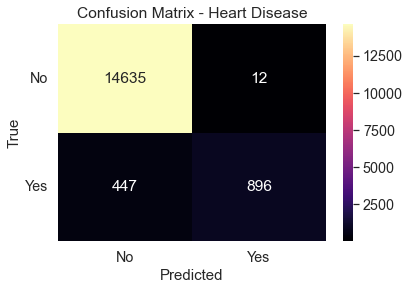

<Figure size 1080x720 with 0 Axes>

In [17]:
# Generate confusion matrix from testing the classifier

test_pred_decision_tree = clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

print(f'False negative rate: {matrix_df[0][1]/matrix_df.values.sum()*100:.2f}%')

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')

ax.set_title('Confusion Matrix - Heart Disease')
ax.set_xlabel('Predicted', fontsize=15)
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('True', fontsize=15)
ax.set_yticklabels(['No', 'Yes'], rotation=0)

plt.show()

Trying a variety of test split sizes, they all seemed to get the maximum depth in the low 40s. While they also shared their ~97% accuracy, I am concerned about overfitting with that kind of depth on the tree. The fact that it maintains accuracy at varied depth makes it possible that I am underestimating how prone the decision tree is to overfitting, or the prevelance of outliers. When thinking critically, it makes sense that heart disease only really occurs in patients who have a number of other factors that can lead to it, so maybe this isn't as much a problem as originally anticipated.

The model produced still has far more false negatives to false positives, but at least the overall accuracy is much better than the previous. This means that while the false negatives are still occurring, they are much less common than before, which could make this model more desirable with the uncapped depth.

To test the potential for overfitting, I also want to make a model with a much larger test set, to see how it is impacted by this. I expect the accuracy to drop only slightly, but it shouldn't be too major considering the dataset.

In [18]:
TEST_SIZE = 0.5
MAX_DEPTH = 1000 # arbitrary
CRITERION = 'gini'

In [19]:
# Format data for decision tree and create train/test split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE)

In [20]:
# Generate decision tree classifier

clf = tree.DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH)
clf.fit(X, Y)

print(f'Maximum depth: {clf.get_depth()}')
print(f'Training set accuracy: {clf.score(x_train, y_train):.3f}')
print(f'Test set accuracy: {clf.score(x_test, y_test):.3f}')

Maximum depth: 43
Training set accuracy: 0.970
Test set accuracy: 0.970


False negative rate: 2.96%


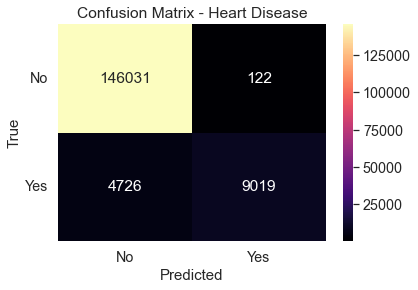

<Figure size 1080x720 with 0 Axes>

In [21]:
# Generate confusion matrix from testing the classifier

test_pred_decision_tree = clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

print(f'False negative rate: {matrix_df[0][1]/matrix_df.values.sum()*100:.2f}%')

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')

ax.set_title('Confusion Matrix - Heart Disease')
ax.set_xlabel('Predicted', fontsize=15)
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('True', fontsize=15)
ax.set_yticklabels(['No', 'Yes'], rotation=0)

plt.show()

Interestingly, the accuracy has stayed almost identical and the false negative only increasing slightly. This may show that the variance in likelihood of heart disease is much smaller than originally expected and that the attributes provided are very relevant.